In [15]:
from sklearn import linear_model # scitkit learn 모듈 내 linear_model 을 불러옴

import numpy as np # numpy 모듈을 np로 이름 변경
#파이썬 언어를 위한 행렬, 벡터 등의 수학 계산을 위한 자료구조와 계산 함수를 제공하는 패키지

import pandas as pd # pandas 모듈을 pd로 이름 변경
#데이터 분석, 가공, 처리 등을 쉽게 하기 위한 자료구조와 처리 함수들을 제공하는 패키지

import matplotlib
#플롯(그래프)를 그릴 때 주로 쓰이는 2D,3D 플롯팅 패키지

import matplotlib.pyplot as plt
#matplotlib의 서브 패키지로 Matlab 처럼 플롯을 그려주는 패키지

from sklearn.metrics import mean_squared_error
#sklearn 패키지에서 제공하는 MSE를 구하기 위한 모듈

%matplotlib inline 
# matplotlib의 시각화 결과를 ipython notebook 내에서 출력하게 하는 함수
matplotlib.style.use('ggplot') #matplotlib 패키지에서 제공하는 스타일 중 ggplot 을 지정

In [16]:
# 데이터 만들기
data = { 'x' : [13, 19, 16, 14, 15, 14],
         'y' : [40, 83, 62, 48, 58, 43]}
# 리스트형식 데이터

data = pd.DataFrame(data)
#pandas.DataFrame() => 2차원의 수정 가능한 테이블 형태의 데이터 구조로 만드는 함수
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


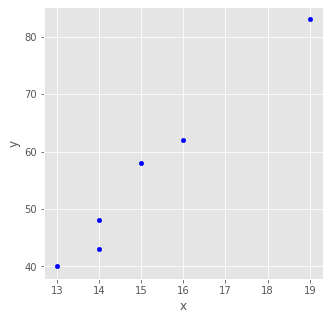

In [17]:
# 산점도로 나타내기
data.plot(kind="scatter", x='x', y='y', figsize=(5,5), color="blue")
#pyplot.plot() 
#kind => 산점도 혹은 기본 선 외 여러가지 플롯 스타일 입력 가능 pie, bar 등등
#x,y => 한 열을 다른 열에 대해 플롯 하기 위해 사용( x=, y=입력 안해도 x,y 자리에 맞춰 그림)
#figsize => 플롯의 크기 조정
#color => 원하는 색상을 입력하여 조정

In [18]:
#데이터 학습시키기
linear_regression = linear_model.LinearRegression() #선형회귀분석 모델 지정
linear_regression.fit(X=pd.DataFrame(data["x"]), y=data["y"]) #선형회귀분석 모델에 맞게 학습하는 함수(단,독립변수 X값은 2차원 형태로 바꾸기위해 pd.DataFrame사용/ 종속변수 y는 기존형태)
prediction = linear_regression.predict(X=pd.DataFrame(data["x"])) #학습한 선형회귀분석 모델을 통해 새로운 값을 예측하는 함수 저장
print('a value = ',linear_regression.intercept_) #선형회귀분석식의 a계수 출력
print('b value = ', linear_regression.coef_) #선형회귀분석식의 b계수 출력

# y= a+bX+e

#y는 특정 관측치(예상값)에 대한 종속변수의 실제값
#X는 이미 알려진 독립변수의 값
#a는 X값이 변해도 Y값에는 영향을 주지 않는 회귀 계수
#b는 X의 영향력을 크기와 부호로 나타내 주는 회귀 계수, 독립변수X의 기울기
#e는 특정 관측치(예상값)과 실제값의 오차항

a value =  -55.48175182481753
b value =  [7.32846715]


In [19]:
#적합도 검증
residuals = data["y"]-prediction #실제 y값에서 모델을 통해 예측한 y값을 빼 잔차를 저장
residuals.describe() #다양한 요약 통계를 생성하는 함수(숫자형인경우 전체개수,평균,표준편차,최대값,최소값,백분위수)
#Pandas.DataFrame.describe()


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [20]:
#적합도 검증
SSE = (residuals**2).sum()
SST = ( (data["y"]-data["y"].mean() )**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared) #R의 제곱 즉 결정계수 제곱근

#numpy.sum()
#numpy.mean()

#SSE = 오차 제곱 합 (각 오차(실제값-예측값)의 제곱들의 합), 즉 실제값과 예측값이 어느정도 오차가 있는지의 정도
#SST = (실제값-실제평균값)의 제곱 합, 즉 실제값들이 실제평균으로부터 흩어진 정도
#SSR = (예측치-실제평균값)의 제곱 합, 즉 예측값들이 실제평균으로부터 흩어진 정도
#결정계수 R^2 = SSR/SST = 1 - (SSE/SST) 

R_squared =  0.9753156179610034


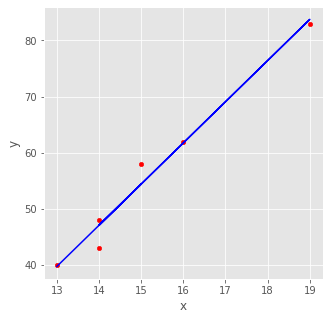

In [21]:
#예측하여 회귀선 나타내기
data.plot(kind="scatter", x="x", y="y", figsize=(5,5), color="red")#실제 값 점으로 찍기
plt.plot(data["x"], prediction, color="blue")#x값들의 예측값 회귀선 그리기

In [22]:
#from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X=pd.DataFrame(data["x"]),y=data["y"]))
#2차원 X의 dataFrame 형태와 y로 지정하여 학습한 모델을 통해 성능 평가(결정계수)
print('Mean_squared_Error = ', mean_squared_error(prediction, data['y']))
#학습한 모델을 통해 나온 예측값과 실제값의 평균제곱오차을 구함 
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)
#MSE를 루트 적용한 값 RMSE

score =  0.9753156179610034
Mean_squared_Error =  5.172749391727503
RMSE =  2.2743679103714736
